# Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Lorenz 96 equation

In [2]:
def dfdy(Xi, F = 8):
    return np.roll(Xi, 1, axis = 1)*(np.roll(Xi, -1, axis = 1)-np.roll(Xi, 2, axis = 1)) - Xi + F

# Initialize experiment (warm up)

In [3]:
# Parameter
N = 100
F = 1
NT = int(5e3)+1
dt = 1e-2
member = 1

# Initial condition
np.random.seed(12229008)
x_init = np.random.normal(loc = 0, scale = 1e-1, size = (N,))

# Total member/time data
x = np.tile(np.zeros_like(x_init), (member, NT, 1))

# Simulation
x[:,0,:] = x_init
for time in range(1,NT):
    x[:,time,:] = x[:,time-1,:] + dfdy(x[:,time-1,:], F)*dt
Dynamical_Equilibrium_State = x[-1,-1,:]

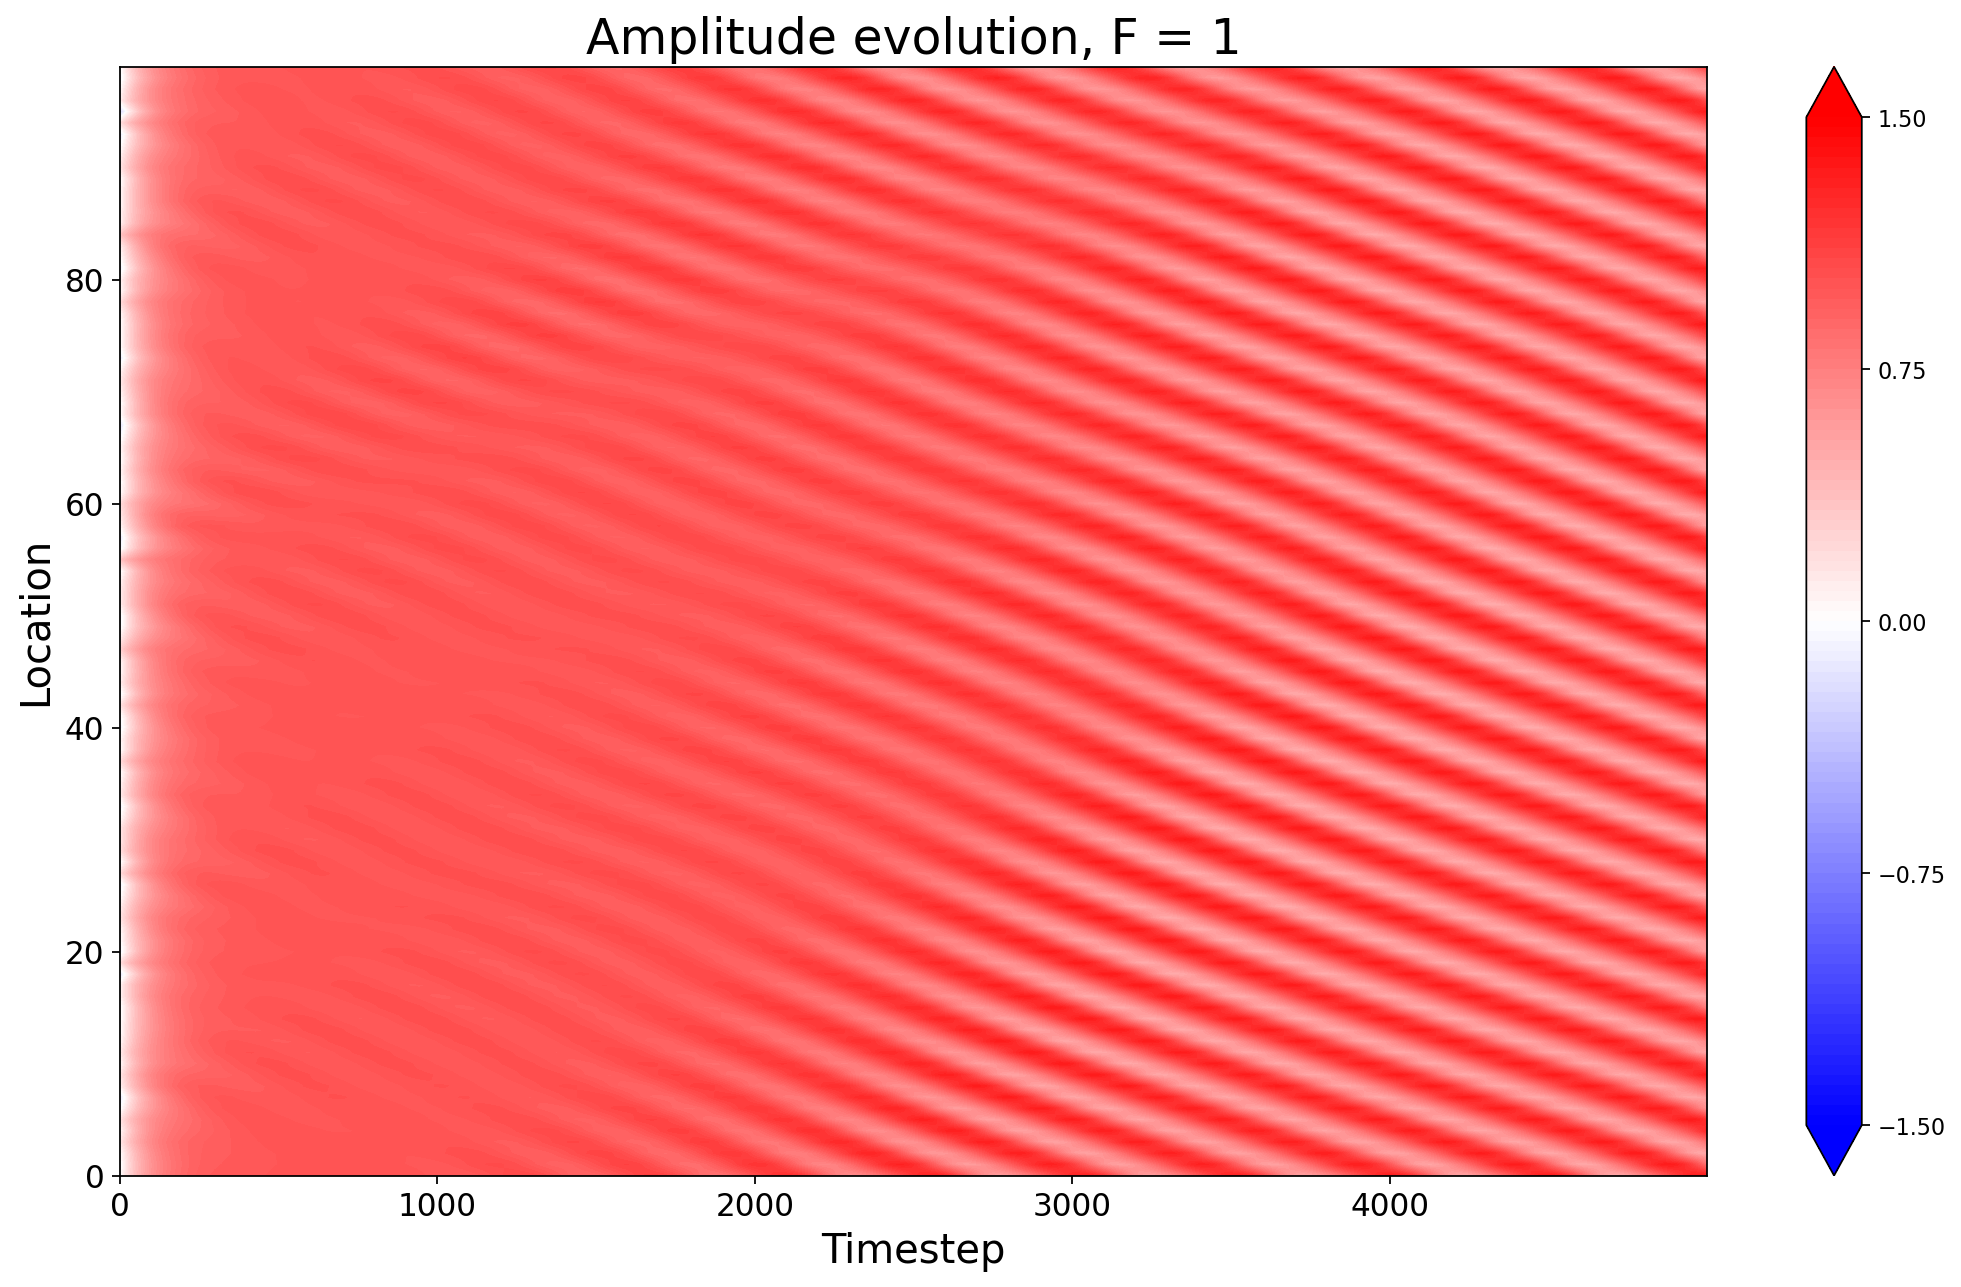

In [4]:
plt.figure(figsize = (16,9), dpi = 160)
im = plt.contourf(x[-1].T, levels = np.linspace(-1.5,1.5,101), extend = "both", cmap = 'bwr')
cbar = plt.colorbar(im)
cbar.set_ticks(np.linspace(-1.5,1.5,5))
plt.xlabel("Timestep", fontsize = 18)
plt.ylabel("Location", fontsize = 18)
plt.xticks(np.linspace(0, int(NT), 5, dtype = np.int64, endpoint = False), fontsize = 14)
plt.yticks(np.linspace(0, int(N), 5, dtype = np.int64, endpoint = False), fontsize = 14)
plt.title(f"Amplitude evolution, F = {F}", fontsize = 22)
plt.savefig(f"F{F}_hovmoller.png")

# Ensemble experiment

In [5]:
# Parameter
member = 500
NT = int(3e4)+1
dt = 1e-2

# Total member/time data
x_ensemble = np.zeros((member, NT, N))

# Simulation
x_ensemble[:,0,:] = Dynamical_Equilibrium_State + np.random.normal(loc = 0, scale = 1e-2, size = (member, N))
for time in range(1,NT):
    x_ensemble[:,time,:] = x_ensemble[:,time-1,:] + dfdy(x_ensemble[:,time-1,:], F)*dt
error = np.mean(np.var(x_ensemble - np.mean(x_ensemble, axis = 0), axis = 0), axis = 1)
index = np.argmax(error[:]/error[0] >= 2)

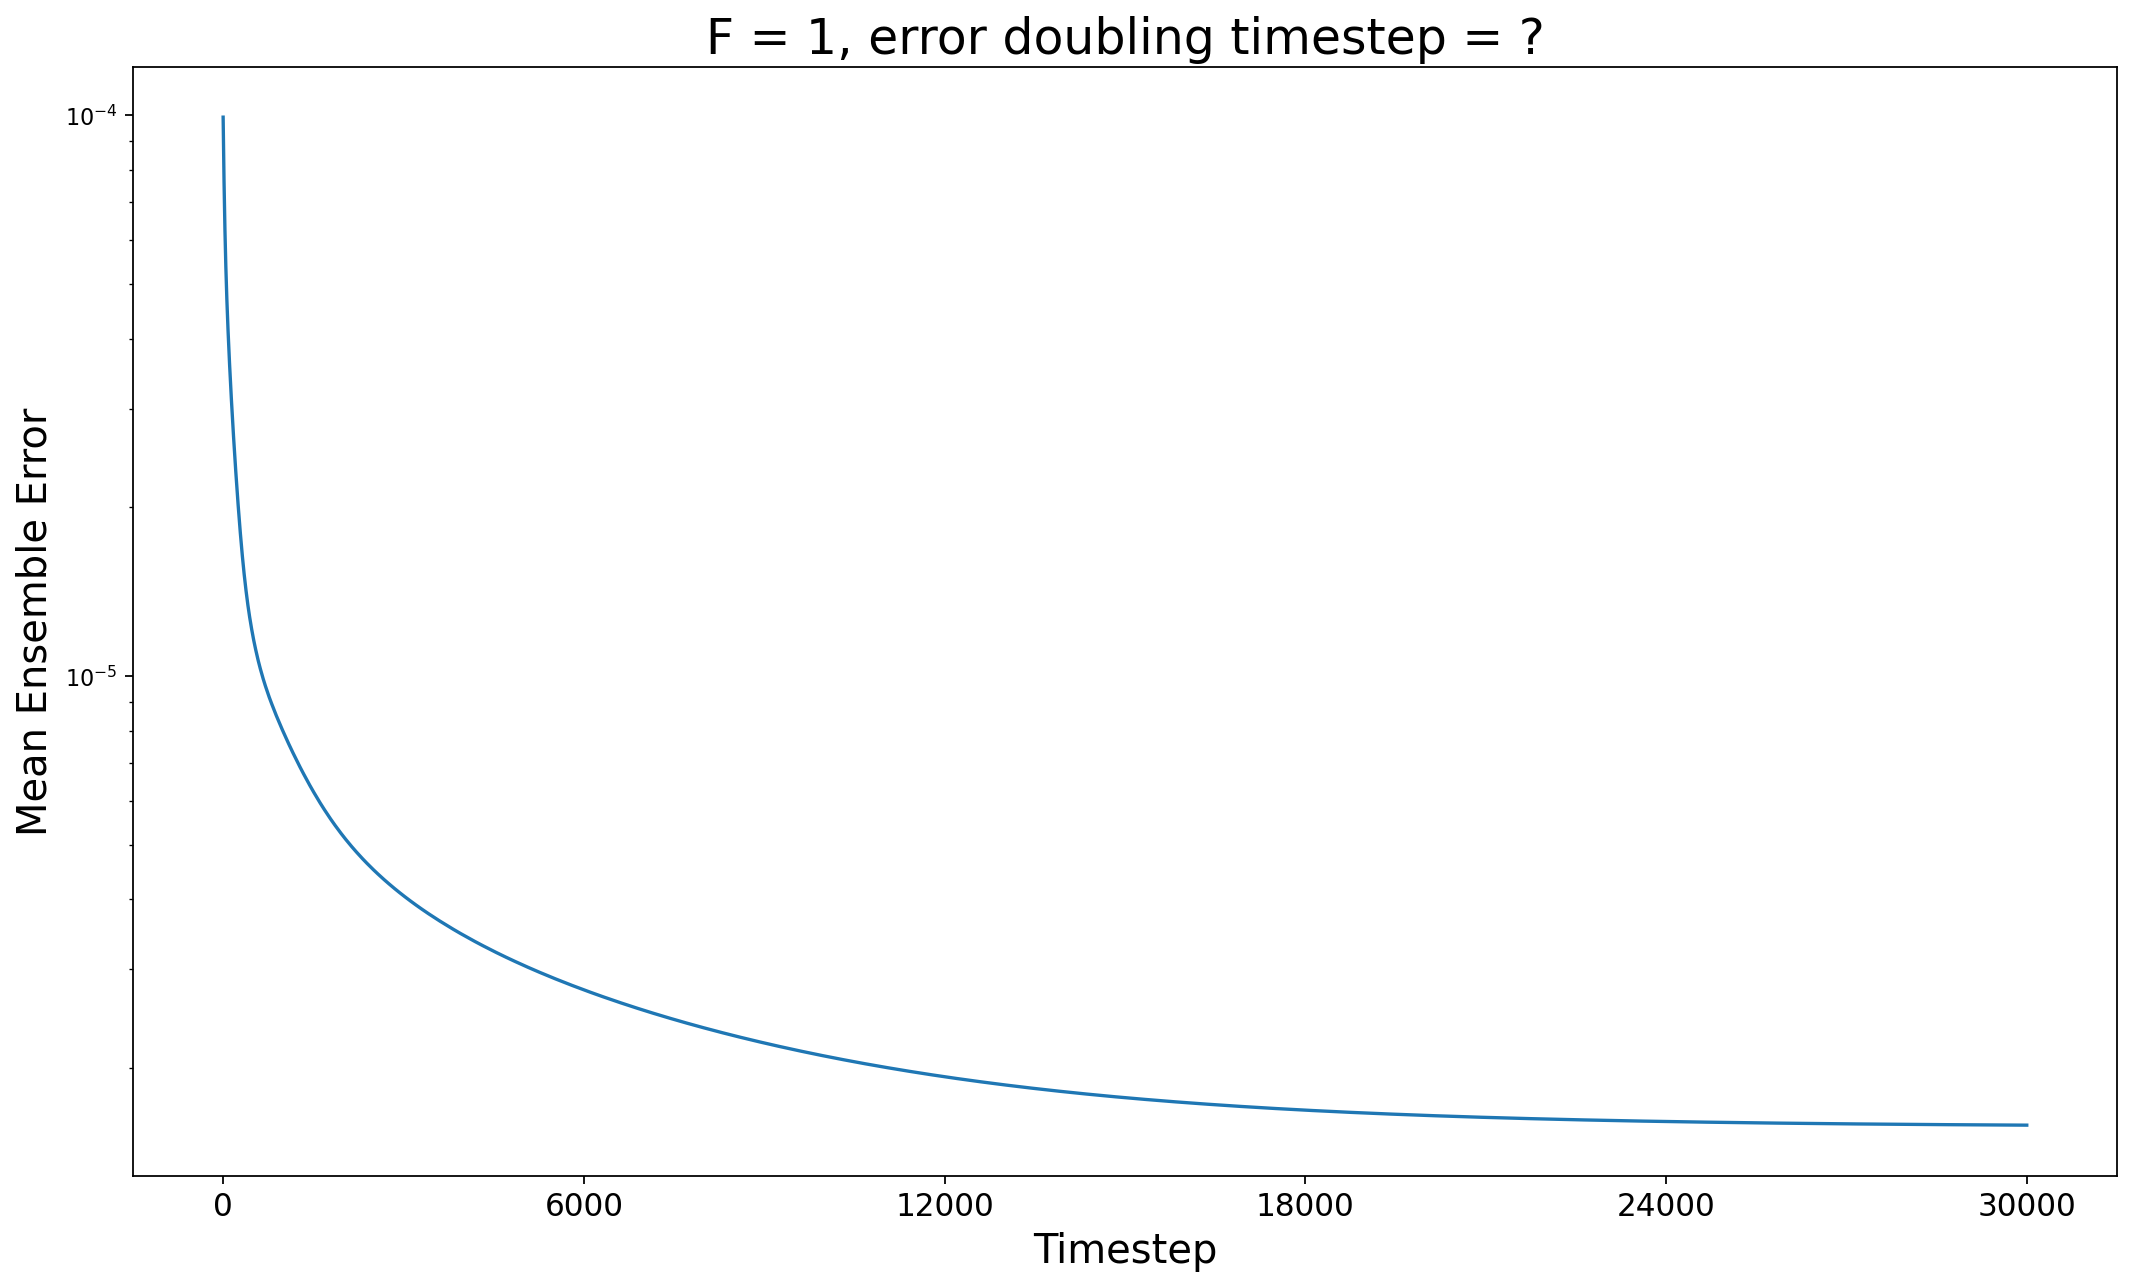

In [8]:
plt.figure(figsize = (16,9), dpi = 160)
plt.plot(error)
plt.xlabel("Timestep", fontsize = 18)
plt.ylabel("Mean Ensemble Error", fontsize = 18)
plt.xticks(np.linspace(0, int(NT-1), 6, dtype = np.int64), fontsize = 14)
plt.yscale("log")

plt.title(f"F = {F}, error doubling timestep = ?", fontsize = 22)
plt.savefig(f"F{F}_ensemble_error.png")

In [7]:
# plt.figure(figsize = (16,9), dpi = 160)
# im = plt.contourf(error.T, levels = np.linspace(0, 1e-3, 61), extend = "both", cmap = 'Reds')
# cbar = plt.colorbar(im)
# cbar.set_ticks(np.linspace(0,1e-3,4))
# plt.xlabel("Timestep", fontsize = 18)
# plt.ylabel("Location", fontsize = 18)
# plt.xticks(np.linspace(0, int(NT), 5, dtype = np.int64, endpoint = False), fontsize = 14)
# plt.yticks(np.linspace(0, int(N), 5, dtype = np.int64, endpoint = False), fontsize = 14)
# plt.title("Amplitude evolution, F = 8", fontsize = 22)
# plt.savefig("weird.png")

# 